In [1]:
import xarray as xr
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data_dir = "../data"

In [12]:
era5_hourly = pd.read_csv(data_dir + "/era5_hourly.csv", parse_dates=["datetime"])
era5_hourly["date"] = pd.to_datetime(era5_hourly["datetime"].dt.date)
era5_hourly["time"] = pd.to_timedelta(era5_hourly.datetime.dt.time.astype(str))
era5_hourly = era5_hourly.drop("datetime", axis=1)
era5_hourly = era5_hourly.set_index(
    ["date", "time"]
).to_xarray()  # date and time as distinct indexes

# Create daily data (with lags)
era5_daily = era5_hourly.mean(dim="time")  # get daily mean
era5_daily["doy"] = era5_daily["date"].dt.dayofyear

In [13]:
era5_daily

<xarray.Dataset>
Dimensions:                  (date: 21184)
Coordinates:
  * date                     (date) datetime64[ns] 1966-01-01 ... 2023-12-31
Data variables:
    temperature_2m           (date) float64 276.2 275.4 273.9 ... 278.9 276.5
    total_precipitation      (date) float64 0.004432 0.009143 ... 0.004221
    surface_pressure         (date) float64 9.381e+04 9.363e+04 ... 9.342e+04
    u_component_of_wind_10m  (date) float64 0.2875 0.6464 ... -0.3124 0.7829
    v_component_of_wind_10m  (date) float64 1.862 2.332 0.9345 ... 0.7162 1.768
    doy                      (date) int64 1 2 3 4 5 6 ... 361 362 363 364 365

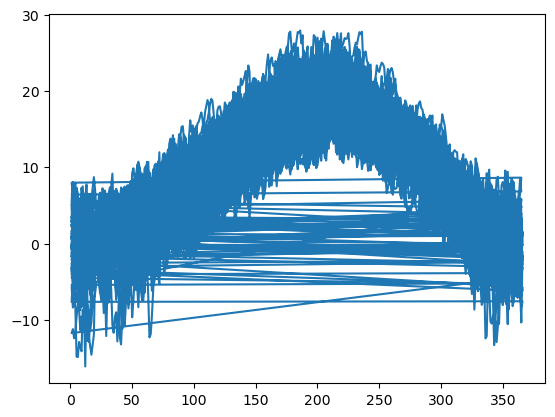

In [14]:
plt.plot(era5_daily.doy, era5_daily.temperature_2m-273.15)